In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
confirmed_global = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
deaths_global = pd.read_csv("data/time_series_covid19_deaths_global.csv")
recovered_global = pd.read_csv("data/time_series_covid19_recovered_global.csv")

In [22]:
#confirmed_global.isnull.sum()
#deaths_global.isnull.sum()
#recovered_global.isnull.sum()

In [7]:
#confirmed_global.head(5)
confirmed_global.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

In [8]:
recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,5,5,10,10,10,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,33,44,52,67,76,89,99,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,31,31,37,46,61,61,62,90,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,10,10,10,10,16,21,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2,2


# Visualizing Coronavirus Distribution by Country with Bar Charts

What are the top 10 countries with confirmed number of cases for 04/06/2020?

In [ ]:
# top_10_confirmed = confirmed_global.groupby('Country/Region')\
#                   .sum().sort_values(by = '4/5/20', ascending = False)\
#                    ['4/5/20'].head(10).reset_index()

In [12]:
top_10_confirmed = confirmed_global.groupby('Country/Region').sum().nlargest(10, '4/5/20')['4/5/20']

In [13]:
top_10_confirmed

Country/Region
US                337072
Spain             131646
Italy             128948
Germany           100123
France             93773
China              82602
Iran               58226
United Kingdom     48436
Turkey             27069
Switzerland        21100
Name: 4/5/20, dtype: int64

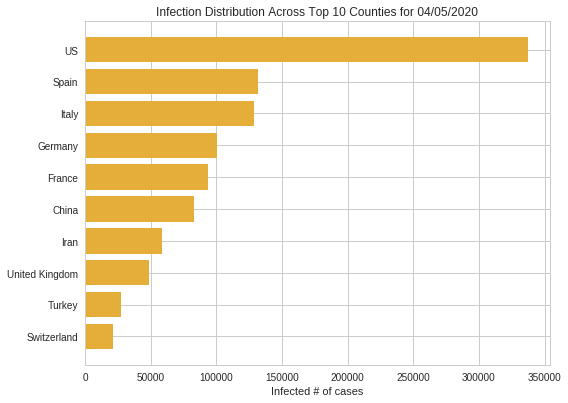

In [81]:
plt.style.use('seaborn-whitegrid')
numbers = list(top_10_confirmed.reset_index()['4/5/20'])[::-1]
countries = list(top_10_confirmed.reset_index()['Country/Region'])[::-1]
plt.barh(countries,numbers,color="#e5ae38")
plt.xlabel('Infected # of cases')
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
plt.tight_layout()
plt.title('Infection Distribution Across Top 10 Counties for 04/05/2020')
plt.show()

# Visualizing the Rate of COVID19 Spread by Country with Line Plot

Are people getting infected faster in US than in other top 4 countries? 

In [25]:
# Index was reset to 'Country/Region', 'Province/State','Lat', 'Long' columns were droped 
confirmed_US = confirmed_global.groupby('Country/Region').sum().loc['US','1/22/20':]
confirmed_Spain = confirmed_global.groupby('Country/Region').sum().loc['Spain','1/22/20':]
confirmed_Italy = confirmed_global.groupby('Country/Region').sum().loc['Italy','1/22/20':]
confirmed_Germany = confirmed_global.groupby('Country/Region').sum().loc['Germany','1/22/20':]
confirmed_France = confirmed_global.groupby('Country/Region').sum().loc['France','1/22/20':]

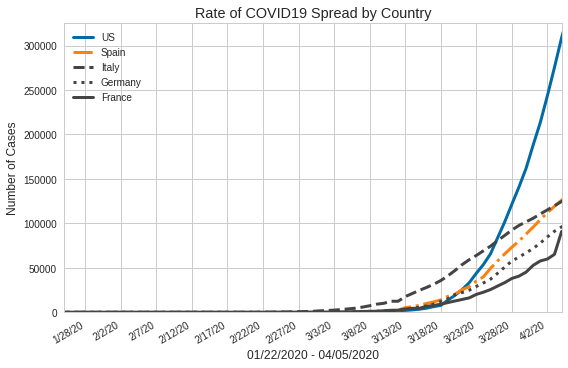

In [58]:
plt.style.use('seaborn-whitegrid')
#print(plt.style.available)
x = list(confirmed_US.index)

plt.plot(x, list(confirmed_US), linewidth = 3,  label='US')

# label = legend
# fmt = '[color][marker][line]'
#plt.plot(ages_x, py_dev_y, color = 'y', linestyle = '--', marker = 'o', label='Python')

plt.plot(x, list(confirmed_Spain), linestyle='-.', linewidth = 3, label='Spain')
# label = legend

plt.plot(x, list(confirmed_Italy), color='#444444', linestyle='--', linewidth = 3, label='Italy')
# color='#444444' - first 44 for red color, second 44 for green they all mixed
# find hex color palets online to create your own

plt.plot(x, list(confirmed_Germany), color='#444444', linestyle=':', linewidth = 3, label='Germany')

plt.plot(x, list(confirmed_France), color='#444444', linestyle='-', linewidth = 3, label='France')

plt.xlabel('01/22/2020 - 04/05/2020')
plt.ylabel('Number of Cases')
plt.title('Rate of COVID19 Spread by Country')

plt.grid(True)

plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('plot.png')
plt.xticks(ticks = np.arange(1,77,5))
plt.gcf().autofmt_xdate()

plt.xlim(3, 73)
plt.ylim(-2, 325000)
plt.show()

# DOCS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

# Relating Variables With Scotter Plots 

Are people recovering globally?

In [60]:
# every date represents the total people in the world
recovered_global_sum = recovered_global.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1, inplace = False).sum()
confirmed_global_sum = confirmed_global.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1, inplace = False).sum()

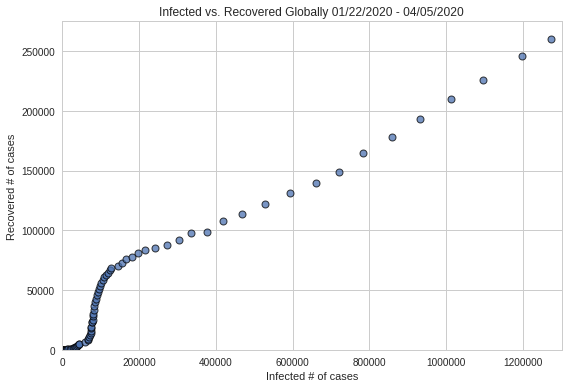

In [67]:
plt.style.use('seaborn-whitegrid')
#print(plt.style.available)
plt.scatter(confirmed_global_sum,recovered_global_sum,
            edgecolor='black', linewidth=1, alpha=0.75)

plt.title('Infected vs. Recovered Globally 01/22/2020 - 04/05/2020')
plt.xlabel('Infected # of cases')
plt.ylabel('Recovered # of cases')

plt.tight_layout()
plt.xlim(0, 1300000)
plt.ylim(0, 275000)
plt.show()

# Matplotlib Marker Styles - http://bit.ly/Matplotlib-Fmt-Str
# Matplotlib Colormaps - https://matplotlib.org/3.1.0/tutorial...

By looking at the graph, it can be concluded that people are recovering across the globe 

Are people recovering in US?

In [68]:
# Index column was set as 'Country/Region' to access it by .loc['country name'] method
recovered_US = (recovered_global.set_index('Country/Region').drop(['Province/State','Lat', 'Long'], axis = 1, inplace = False)).loc['US']
confirmed_US = (confirmed_global.set_index('Country/Region').drop(['Province/State','Lat', 'Long'], axis = 1, inplace = False)).loc['US']

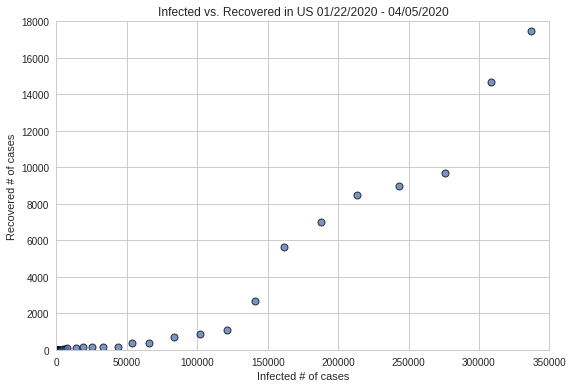

In [72]:
plt.style.use('seaborn-whitegrid')

plt.scatter(confirmed_US,recovered_US,
            edgecolor='black', linewidth=1, alpha=0.75)

plt.title('Infected vs. Recovered in US 01/22/2020 - 04/05/2020')
plt.xlabel('Infected # of cases')
plt.ylabel('Recovered # of cases')

plt.tight_layout()
plt.xlim(0, 350000)
plt.ylim(0, 18000)

plt.show()

# Matplotlib Marker Styles - http://bit.ly/Matplotlib-Fmt-Str
# Matplotlib Colormaps - https://matplotlib.org/3.1.0/tutorial...

By looking at the graph, it can be concluded that people are recovering across US